In [4]:
# Instalar paquetes necesarios (si aún no están instalados)
if(!require(funData)) install.packages("funData")
if(!require(MFPCA)) install.packages("MFPCA")
if(!require(robustbase)) install.packages("robustbase")
if(!require(ggplot2)) install.packages("ggplot2")

# Cargar paquetes
library(funData)
library(MFPCA)
library(robustbase)
library(ggplot2)


Cargando paquete requerido: robustbase

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"no hay paquete llamado 'robustbase'"
Installing package into 'C:/Users/pleal/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependency 'DEoptimR'




package 'DEoptimR' successfully unpacked and MD5 sums checked
package 'robustbase' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pleal\AppData\Local\Temp\RtmpukM4FL\downloaded_packages


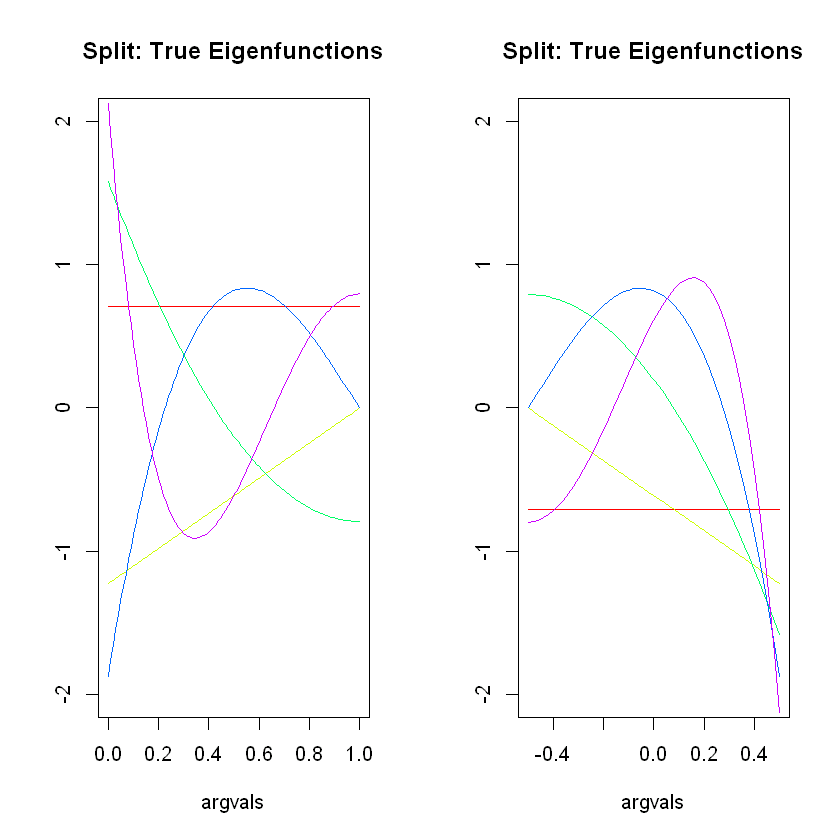

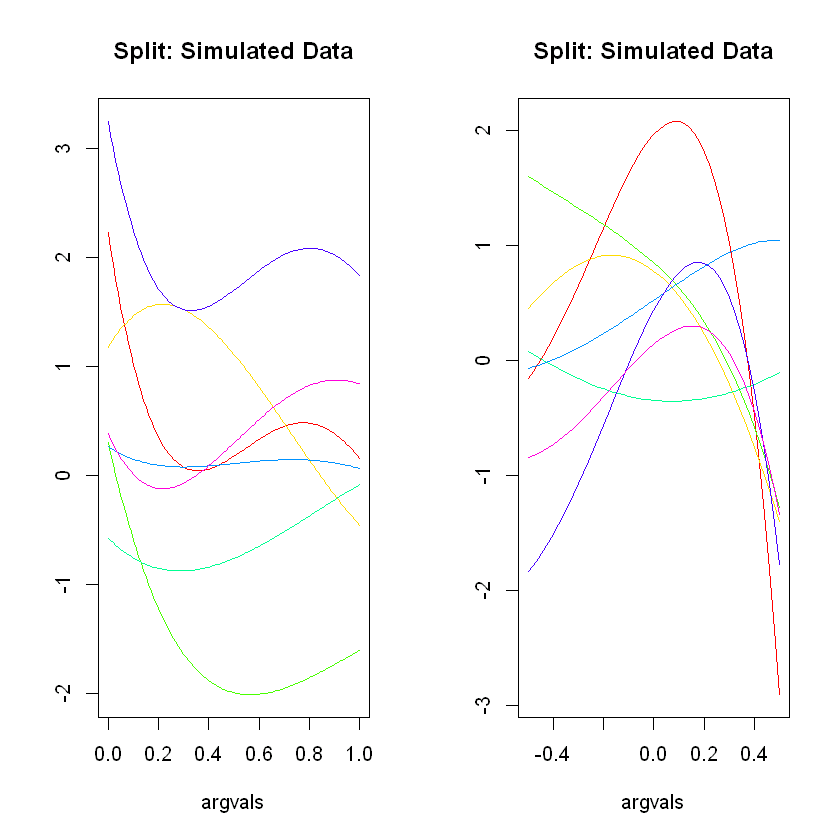

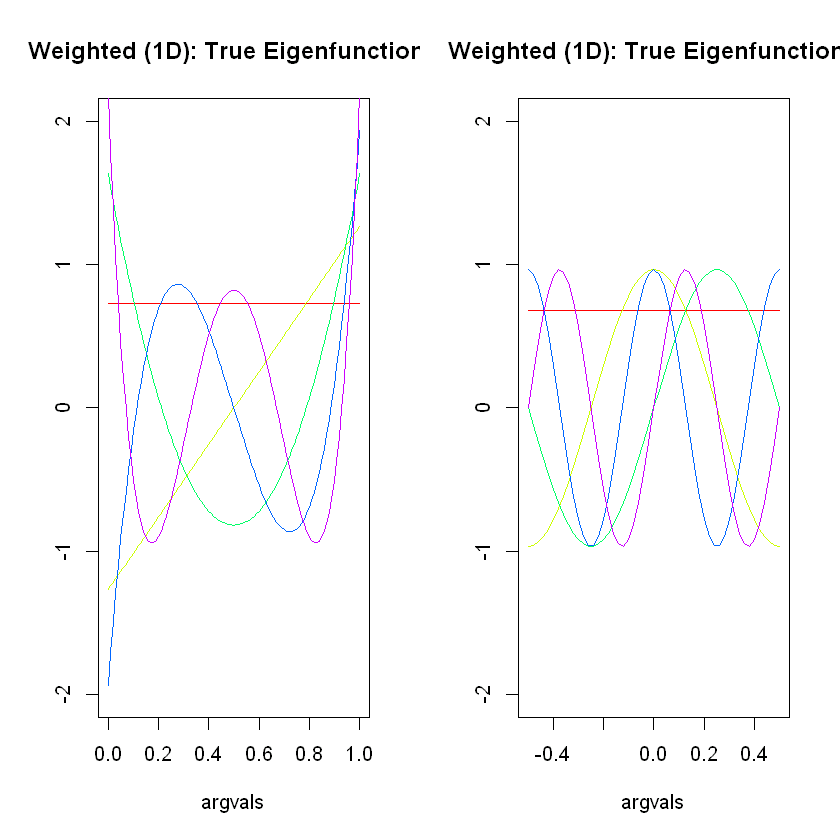

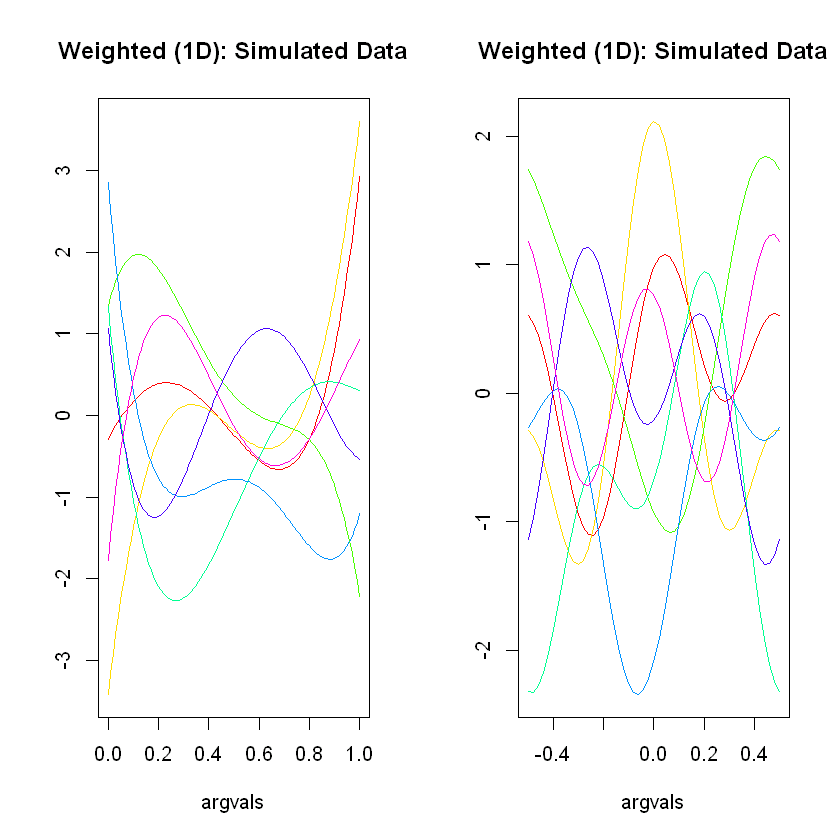

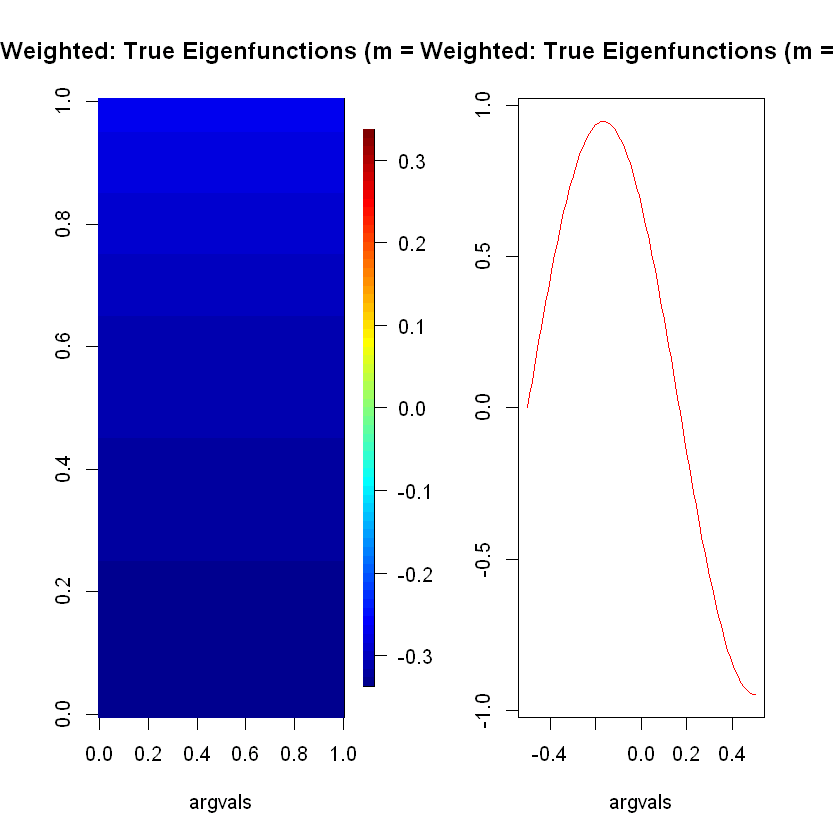

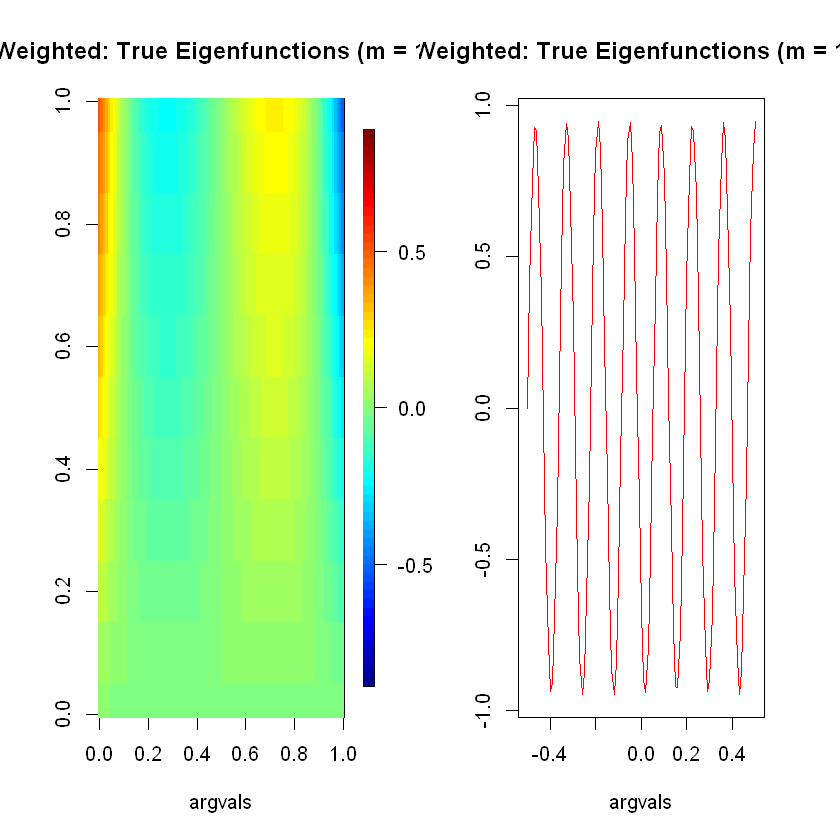

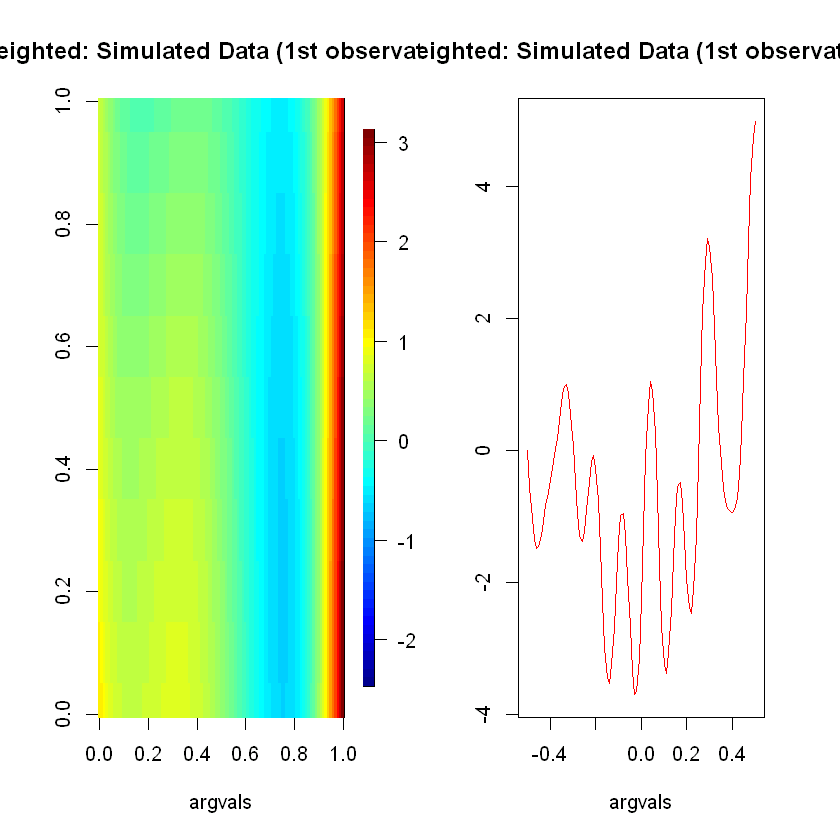

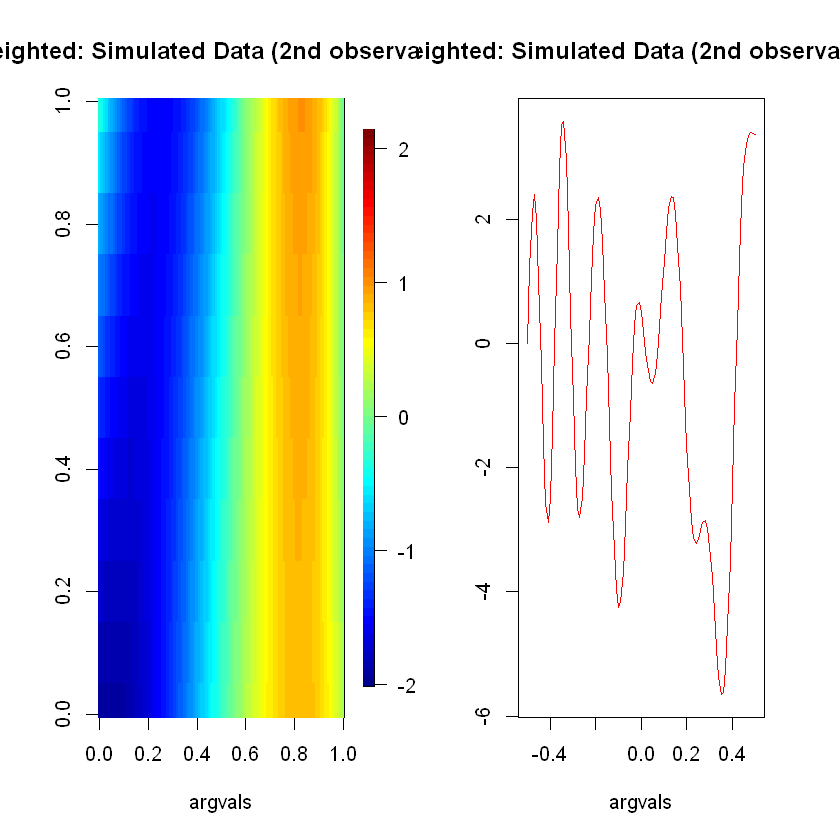

In [7]:
oldPar <- par(no.readonly = TRUE)

# split
split <- simMultiFunData(type = "split", argvals = list(seq(0,1,0.01), seq(-0.5,0.5,0.02)),
                 M = 5, eFunType = "Poly", eValType = "linear", N = 7)

par(mfrow = c(1,2))
plot(split$trueFuns, main = "Split: True Eigenfunctions", ylim = c(-2,2))
plot(split$simData, main = "Split: Simulated Data")

# weighted (one-dimensional domains)
weighted1D <- simMultiFunData(type = "weighted",
                 argvals = list(list(seq(0,1,0.01)), list(seq(-0.5,0.5,0.02))),
                 M = c(5,5), eFunType = c("Poly", "Fourier"), eValType = "linear", N = 7)

plot(weighted1D$trueFuns, main = "Weighted (1D): True Eigenfunctions", ylim = c(-2,2))
plot(weighted1D$simData, main = "Weighted (1D): Simulated Data")

# weighted (one- and two-dimensional domains)
weighted <- simMultiFunData(type = "weighted",
               argvals = list(list(seq(0,1,0.01), seq(0,10,0.1)), list(seq(-0.5,0.5,0.01))),
               M = list(c(5,4), 20), eFunType = list(c("Poly", "Fourier"), "Wiener"),
               eValType = "linear", N = 7)

plot(weighted$trueFuns, main = "Weighted: True Eigenfunctions (m = 2)", obs = 2)
plot(weighted$trueFuns, main = "Weighted: True Eigenfunctions (m = 15)", obs = 15)
plot(weighted$simData, main = "Weighted: Simulated Data (1st observation)", obs = 1)
plot(weighted$simData, main = "Weighted: Simulated Data (2nd observation)", obs = 2)

par(oldPar)
